#Download the dataset water-consumption-rates-in-the-new-york-city.csv

In [ ]:
from google.colab import files #This cell is used when running this code on Google Colab Platform
#uploaded = files.upload()

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import math
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the time series data

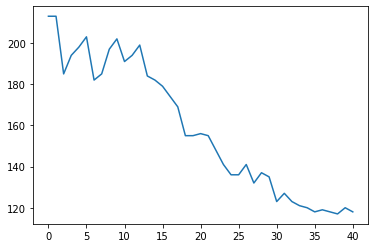

In [ ]:
# load  and plot the dataset excluding the first column
dataframe = pd.read_csv('water-consumption-in-the-new-york-city.csv', usecols=[3], engine='python')
plt.plot(dataframe)
plt.show()

#Build an LSTM network

In [ ]:
#A function that converts an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
#Fix the random number seed to 0 in numpy for reproducibility
np.random.seed(0)

In [ ]:
#Convert the integer values in the data to floating point values
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
#Normalize the data to range (0 - 1) using MinMaxScaler
Scaler = MinMaxScaler()
dataset = Scaler.fit_transform(dataset)

In [ ]:
#Split the first 67% of the data as training data
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
#And split the remaining 33% as testing data
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
#Obtain the two-column input-output dataset
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
model = Sequential()

#Build the LSTM network with a hidden layer of 4 neurons
model.add(LSTM(4, input_dim=look_back, recurrent_activation='sigmoid', return_sequences=True))

#And an output layer with a single neuron
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

#Reshape the input data to be in the [samples, time steps, features] format
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
22/22 - 3s - loss: 0.3261
Epoch 2/200
22/22 - 0s - loss: 0.2430
Epoch 3/200
22/22 - 0s - loss: 0.1721
Epoch 4/200
22/22 - 0s - loss: 0.1203
Epoch 5/200
22/22 - 0s - loss: 0.0794
Epoch 6/200
22/22 - 0s - loss: 0.0499
Epoch 7/200
22/22 - 0s - loss: 0.0345
Epoch 8/200
22/22 - 0s - loss: 0.0254
Epoch 9/200
22/22 - 0s - loss: 0.0211
Epoch 10/200
22/22 - 0s - loss: 0.0201
Epoch 11/200
22/22 - 0s - loss: 0.0191
Epoch 12/200
22/22 - 0s - loss: 0.0187
Epoch 13/200
22/22 - 0s - loss: 0.0185
Epoch 14/200
22/22 - 0s - loss: 0.0180
Epoch 15/200
22/22 - 0s - loss: 0.0178
Epoch 16/200
22/22 - 0s - loss: 0.0175
Epoch 17/200
22/22 - 0s - loss: 0.0173
Epoch 18/200
22/22 - 0s - loss: 0.0168
Epoch 19/200
22/22 - 0s - loss: 0.0166
Epoch 20/200
22/22 - 0s - loss: 0.0163
Epoch 21/200
22/22 - 0s - loss: 0.0161
Epoch 22/200
22/22 - 0s - loss: 0.0160
Epoch 23/200
22/22 - 0s - loss: 0.0154
Epoch 24/200
22/22 - 0s - loss: 0.0152
Epoch 25/200
22/22 - 0s - loss: 0.0151
Epoch 26/200
22/22 - 0s - loss: 0.

In [ ]:
#pickle.dump(model, open('model_LSTM.pkl', 'wb'))
#with open('pickled_data_file.pkl', 'wb') as fid:
#    pickle.dump(model, fid)

In [ ]:
#Calculate and print the root-mean-squared-error (RMSE) in training and test data
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.08 RMSE)
Test Score: 0.00 MSE (0.05 RMSE)


In [ ]:
#Predict the next month's number of passengers
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

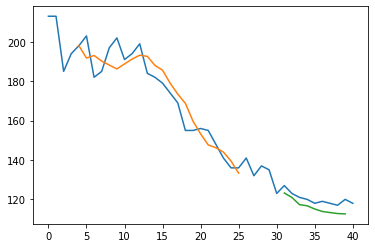

In [ ]:
#Reshape the input data
trainPredict = np.reshape(trainPredict, (trainPredict.shape[0], trainPredict.shape[1]))
testPredict = np.reshape(testPredict, (testPredict.shape[0], testPredict.shape[1]))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions after inverting their values
plt.plot(Scaler.inverse_transform(dataset))
plt.plot(Scaler.inverse_transform(trainPredictPlot))
plt.plot(Scaler.inverse_transform(testPredictPlot))

#Align and plot the actual and predicted values for the entire dataset
plt.show()

#Build VAR model

In [ ]:
df = pd.read_csv('water-consumption-in-the-new-york-city.csv')
df.head()

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198


In [ ]:
df.dtypes

Year                                          int64
New York City Population                    float64
NYC Consumption(Million gallons per day)    float64
Per Capita(Gallons per person per day)        int64
dtype: object

In [ ]:
df['Year'] = pd.to_datetime(df.Year , format = '%Y')
df.dtypes

Year                                        datetime64[ns]
New York City Population                           float64
NYC Consumption(Million gallons per day)           float64
Per Capita(Gallons per person per day)               int64
dtype: object

In [ ]:
data = df.drop(['Year'], axis=1)
data.index = df.Year
data.dtypes

New York City Population                    float64
NYC Consumption(Million gallons per day)    float64
Per Capita(Gallons per person per day)        int64
dtype: object

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(data,-1,1).eig

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([0.425835  , 0.20677721, 0.00382673])

In [ ]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

In [ ]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [ ]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[data.columns])

for j in range(0,len(data.columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

from sklearn.metrics import mean_squared_error
cols = data.columns
#check rmse
print('rmse value for', cols[1], 'is : ', np.sqrt(mean_squared_error(pred[[cols[1]]], valid[[cols[1]]])))

rmse value for NYC Consumption(Million gallons per day) is :  11.685313827922855


In [ ]:
actual_consumption = valid['NYC Consumption(Million gallons per day)']
predicted_consumption = pred[['NYC Consumption(Million gallons per day)']]

In [ ]:
Actual_consumption = actual_consumption.to_frame()

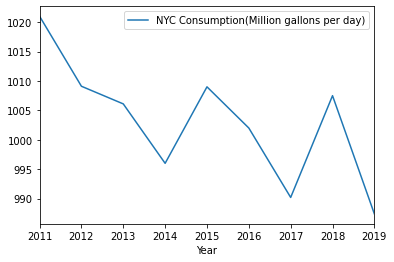

In [ ]:
ax = Actual_consumption.plot()

#predicted_consumption.plot(ax=ax)

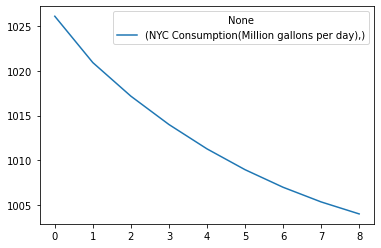

In [ ]:
ay = predicted_consumption.plot()

In [ ]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [ ]:
pickle.dump(model_fit, open('model_VAR.pkl', 'wb'))

In [ ]:
print('Next Year Consumption is: ', yhat[2, [2]])

Next Year Consumption is:  [118.51937066]


# Flask API deployment

In [ ]:
#install flask-ngrok library
!pip install flask-ngrok

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify, render_template
import numpy as np
import pickle

app = Flask(__name__, template_folder='/content/drive/MyDrive/static/templates')
run_with_ngrok(app)   #starts ngrok when the app is run

model = pickle.load(open('/content/drive/MyDrive/static/templates/model_VAR.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in request.form.values()]
    final_features = np.array(int_features)
    #prediction = model.predict(final_features)

    print(type(final_features))
    prediction = model_fit.forecast(model_fit.y, steps=final_features[0])
    
    output = prediction[:, [2]]

    return render_template('index.html', prediction_text='Consumption should be {}'.format(output))

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://6e6cf3c98264.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [09/Feb/2021 05:52:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Feb/2021 05:52:29] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
127.0.0.1 - - [09/Feb/2021 05:52:33] "POST /predict HTTP/1.1" 200 -


<class 'numpy.ndarray'>


127.0.0.1 - - [09/Feb/2021 05:52:40] "POST /predict HTTP/1.1" 200 -


<class 'numpy.ndarray'>


127.0.0.1 - - [09/Feb/2021 05:52:49] "POST /predict HTTP/1.1" 200 -


<class 'numpy.ndarray'>
